## loading training and test data

In [50]:
import numpy as np 
import pandas as pd 
import os

In [51]:
path = "/content/mammuka-lalettan"
os.listdir(path)

['train', 'test']

In [78]:
train_path = os.path.join("/content/mammuka-lalettan", "train")
print(os.listdir(train_path))
print("="*100)
test_path = os.path.join("/content/mammuka-lalettan", "test")
print(os.listdir(test_path))

['mammuka', 'lalettan']
['mammuka', 'lalettan']


## importing libraries

In [93]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

### Training nueral network

In [102]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [103]:
inception_model = model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [104]:
batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    "/content/mammuka-lalettan/train",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    "/content/mammuka-lalettan/test", 
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') 

Found 3222 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [105]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
201/201 [==============================] - 20s 96ms/step - loss: 0.7264 - accuracy: 0.5466 - val_loss: 0.6887 - val_accuracy: 0.5365
Epoch 2/20
201/201 [==============================] - 19s 96ms/step - loss: 0.6888 - accuracy: 0.5412 - val_loss: 0.6570 - val_accuracy: 0.6458
Epoch 3/20
201/201 [==============================] - 19s 94ms/step - loss: 0.6683 - accuracy: 0.6006 - val_loss: 0.6544 - val_accuracy: 0.5677
Epoch 4/20
201/201 [==============================] - 19s 94ms/step - loss: 0.6604 - accuracy: 0.6010 - val_loss: 0.6508 - val_accuracy: 0.6094
Epoch 5/20
201/201 [==============================] - 19s 94ms/step - loss: 0.6452 - accuracy: 0.6170 - val_loss: 0.6531 - val_accuracy: 0.6302
Epoch 6/20
201/201 [==============================] - 19s 95ms/step - loss: 0.6383 - accuracy: 0.6406 - val_loss: 0.6300 - val_accuracy: 0.6875
Epoch 7/20
201/201 [==============================] - 19s 95ms/step - loss: 0.6315 - accuracy: 0.6449 - val_loss: 0.7095 - val_accuracy:

## Evaluating the Mobilenet model

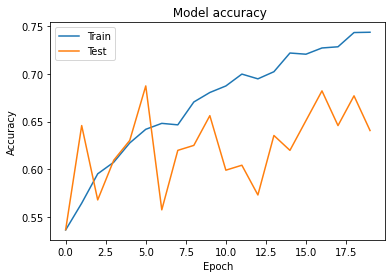

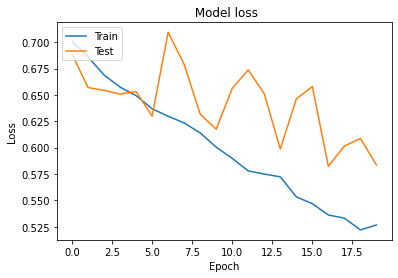

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(' Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show()

## saving the model

In [120]:
# model.save

from tensorflow.keras.models import load_model

model.save('inceptionv3.h5')

## Testing Detection

In [ ]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("inceptionv3.model")

In [ ]:
prediction = model.predict([prepare("/conent/mamuka.jpg")])
np.argmax(prediction)

## Converting .h5 to TFLite model


In [121]:
# inceptionv3 model

keras_model= tf.keras.models.load_model(filepath="/content/mammuka-lalettan/test/inceptionv3.h5")

tflite_converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = tflite_converter.convert()
open("inceptionv3.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp87vzlneo/assets


192148